In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np 
import pandas as pd
from scipy.stats import norm

In [2]:
btc = yf.download("BTC-USD")
btc = btc.loc['2020-01-01':'2023-01-01',:] 
btc.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


<AxesSubplot: title={'center': 'Close price of Bitcoin from 2020 to 2023'}, xlabel='Date', ylabel='US$'>

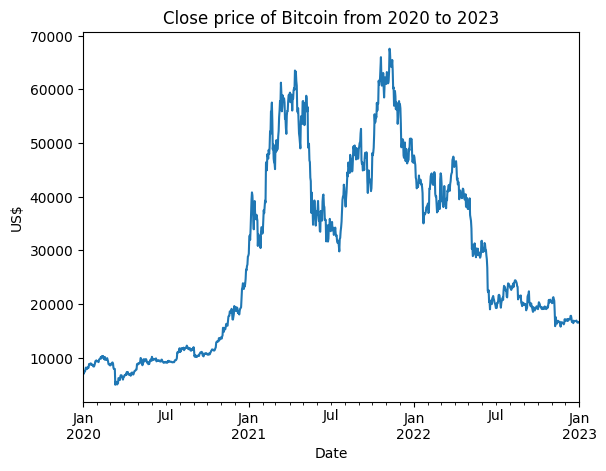

In [3]:
plt.title('Close price of Bitcoin from 2020 to 2023')
plt.xlabel('Time')
plt.ylabel('US$')
btc.loc[:,'Close'].plot()

/var/folders/9_/mqsyyrcx6n93sgb32yjd96140000gn/T/ipykernel_73804/1429421456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['logreturn'] = np.log(btc['Close'].shift(-1)) - np.log(btc['Close'])


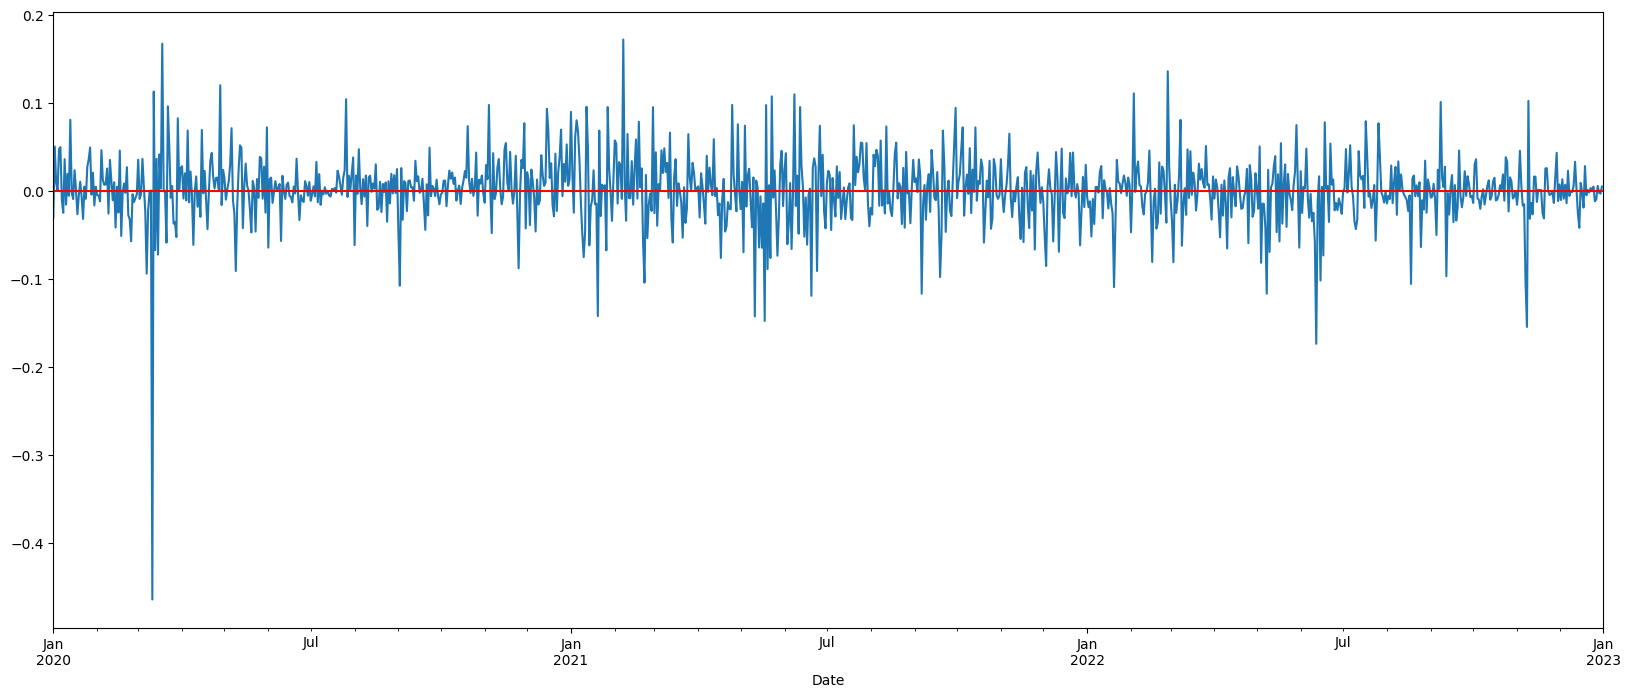

,Open,High,Low,Close,Adj Close,Volume,logreturn
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,-0.030273
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,0.050172
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.008915
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.000089
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.047161


In [4]:
btc['logreturn'] = np.log(btc['Close'].shift(-1)) - np.log(btc['Close'])
btc['logreturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.xlim(btc.index[0],btc.index[-1])
plt.show()
btc.head()


<AxesSubplot: title={'center': 'Histogram of daily returns of Bitcoin from 2020 to 2023'}>

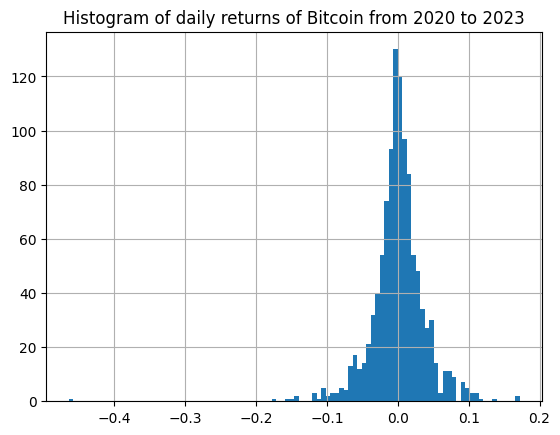

In [5]:
plt.title('Histogram of daily returns of Bitcoin from 2020 to 2023')
btc.loc[:,'logreturn'].dropna().hist(bins=100)

In [6]:
#test statistic

sample_mean = btc['logreturn'].mean()
sample_std = btc['logreturn'].std(ddof=1)
n = btc['logreturn'].shape[0] 

zhat = (sample_mean - 0) / (sample_std / n**0.5)
print(zhat)

0.6516549535669016


In [7]:
#alhpa level

alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
print(zleft,zright)
print('At significance level {}, Shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

-1.9599639845400545 1.9599639845400545
At significance level 0.05, Shall we reject: False


In [8]:
alpha = 0.05
zright = norm.ppf(1-alpha, 0, 1)
print(zright)
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

1.6448536269514722
At significant level of 0.05, shall we reject: False


In [9]:
#Use P value

alpha = 0.05
p = 1 - norm.cdf(zhat,0,1)
print(p)

0.2573118941763687


In [10]:
print('At significance level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significance level of 0.05, shall we reject: False
